In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Count of fraudulent vs non-fraudulent transactions
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
fraud_percentage = (df['Class'].value_counts(normalize=True) * 100)
print(fraud_percentage)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [8]:
# Descriptive statistics
print(df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

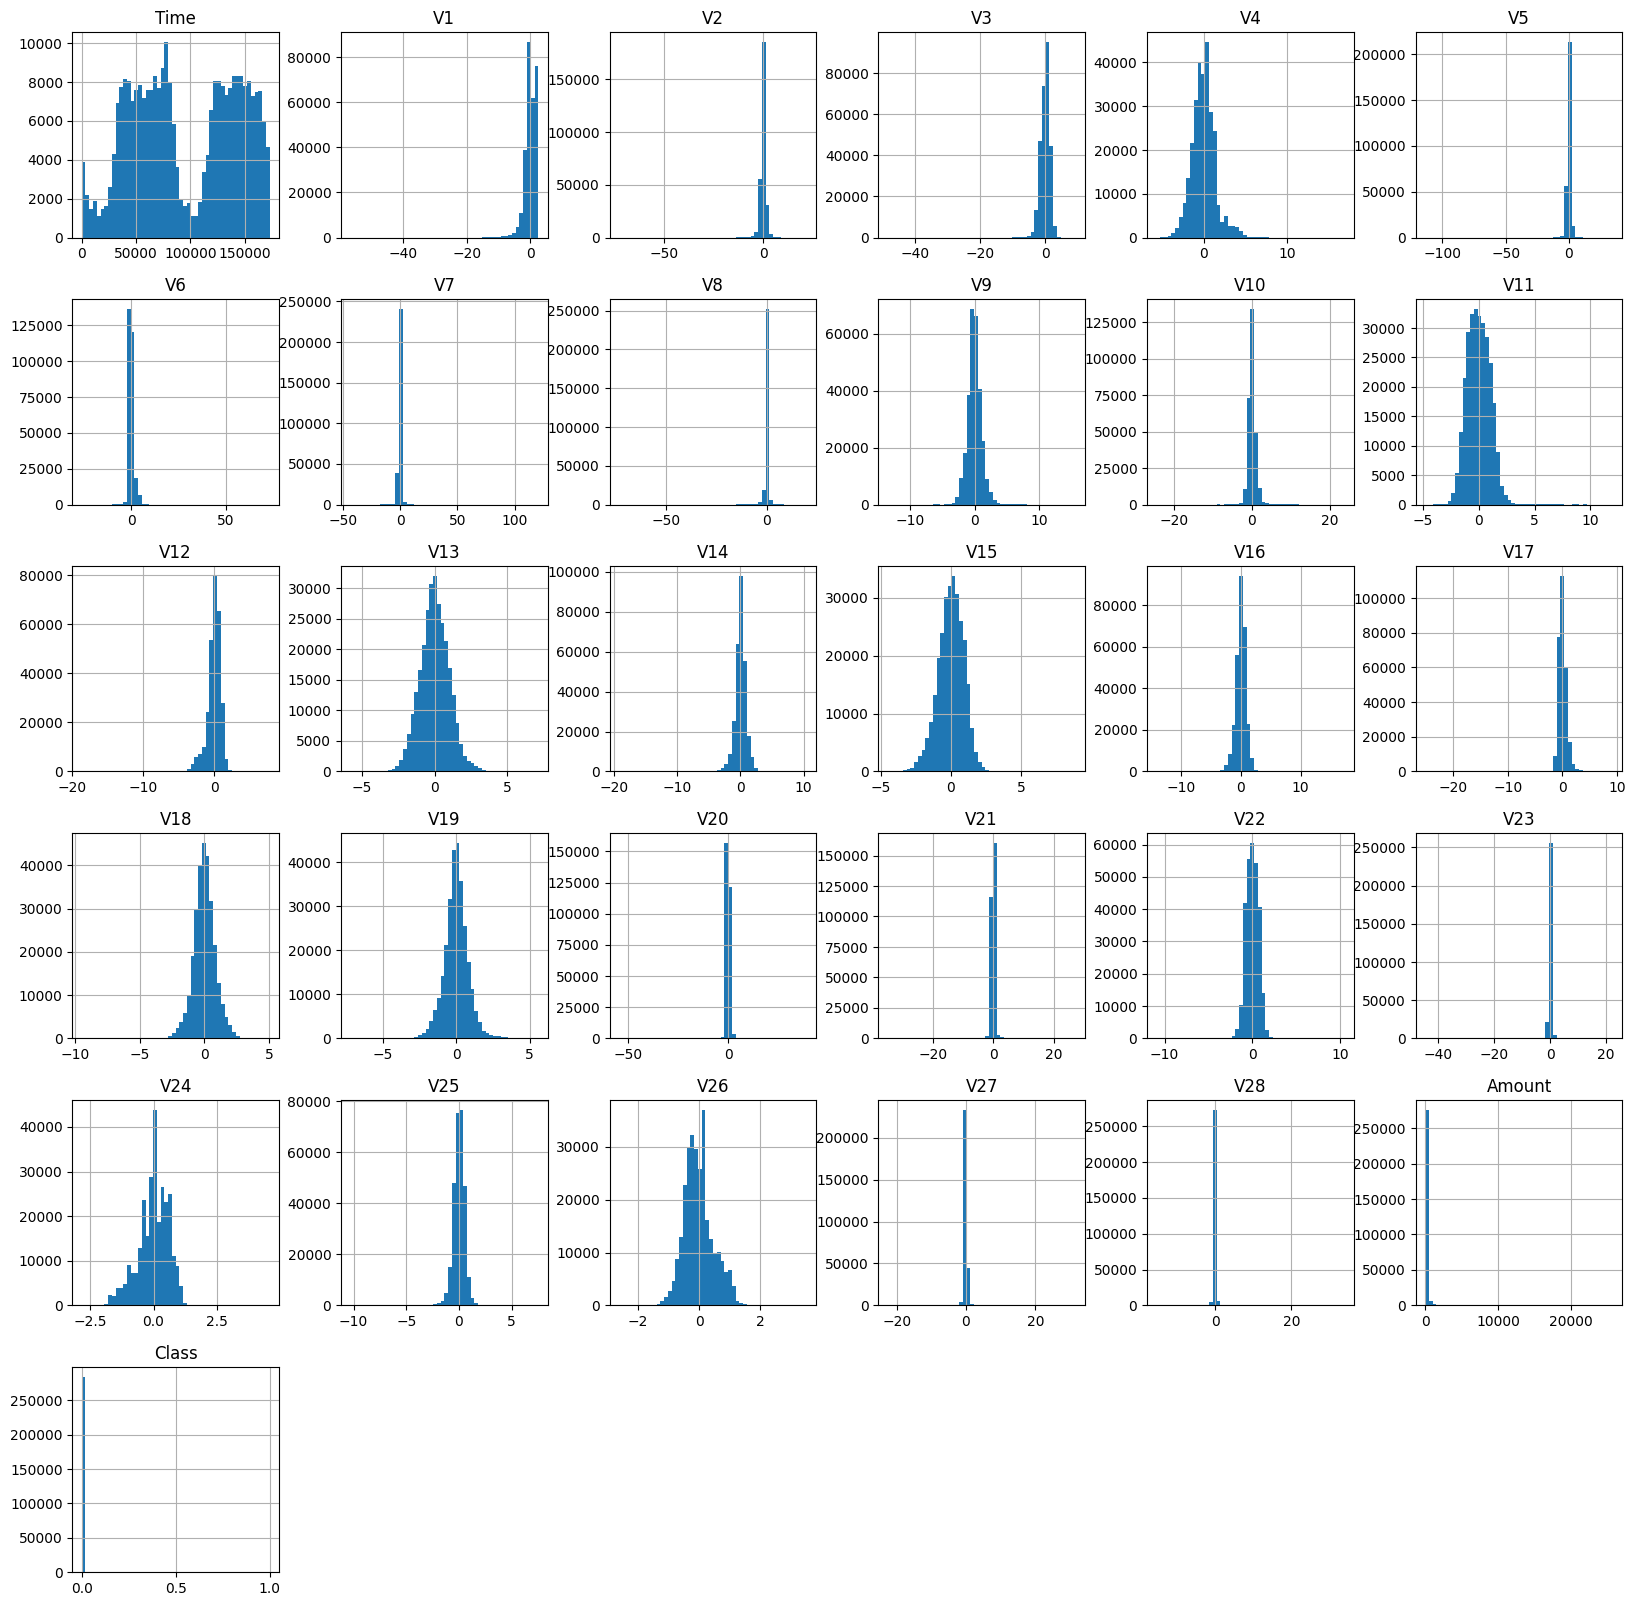

In [9]:
# Plot histograms for all features
df.hist(figsize=(20, 20), bins=50)
plt.show()


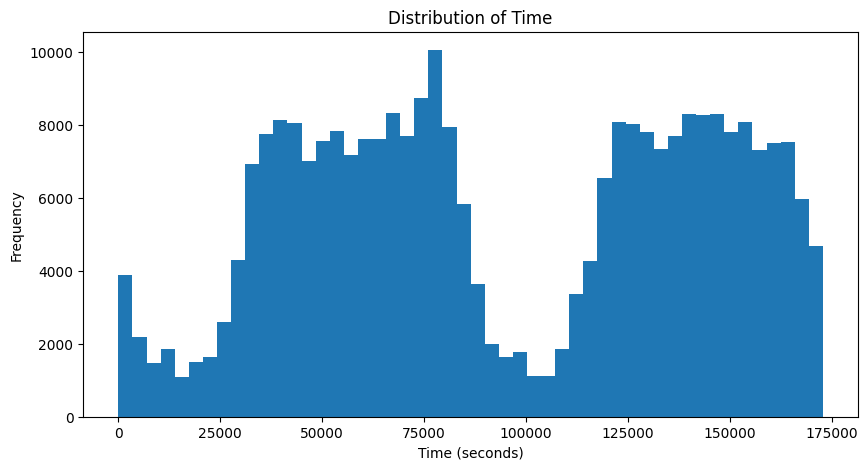

In [10]:
# Plot distribution of 'Time'
plt.figure(figsize=(10, 5))
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()




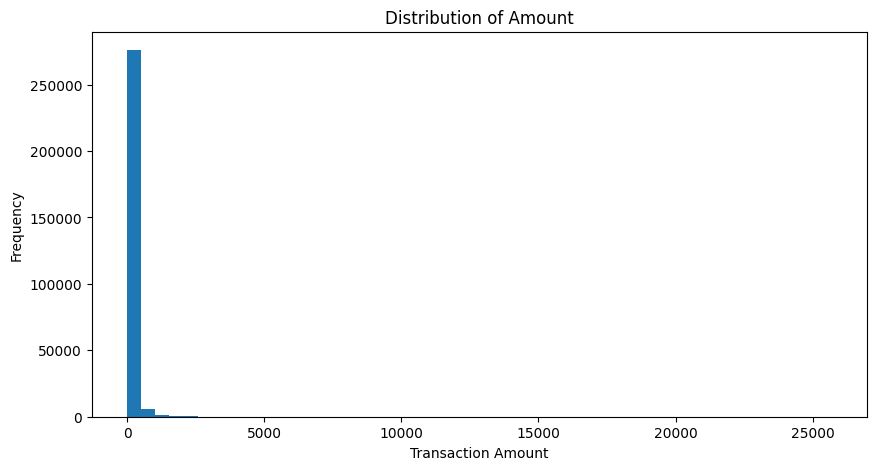

In [11]:
# Plot distribution of 'Amount'
plt.figure(figsize=(10, 5))
plt.hist(df['Amount'], bins=50)
plt.title('Distribution of Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

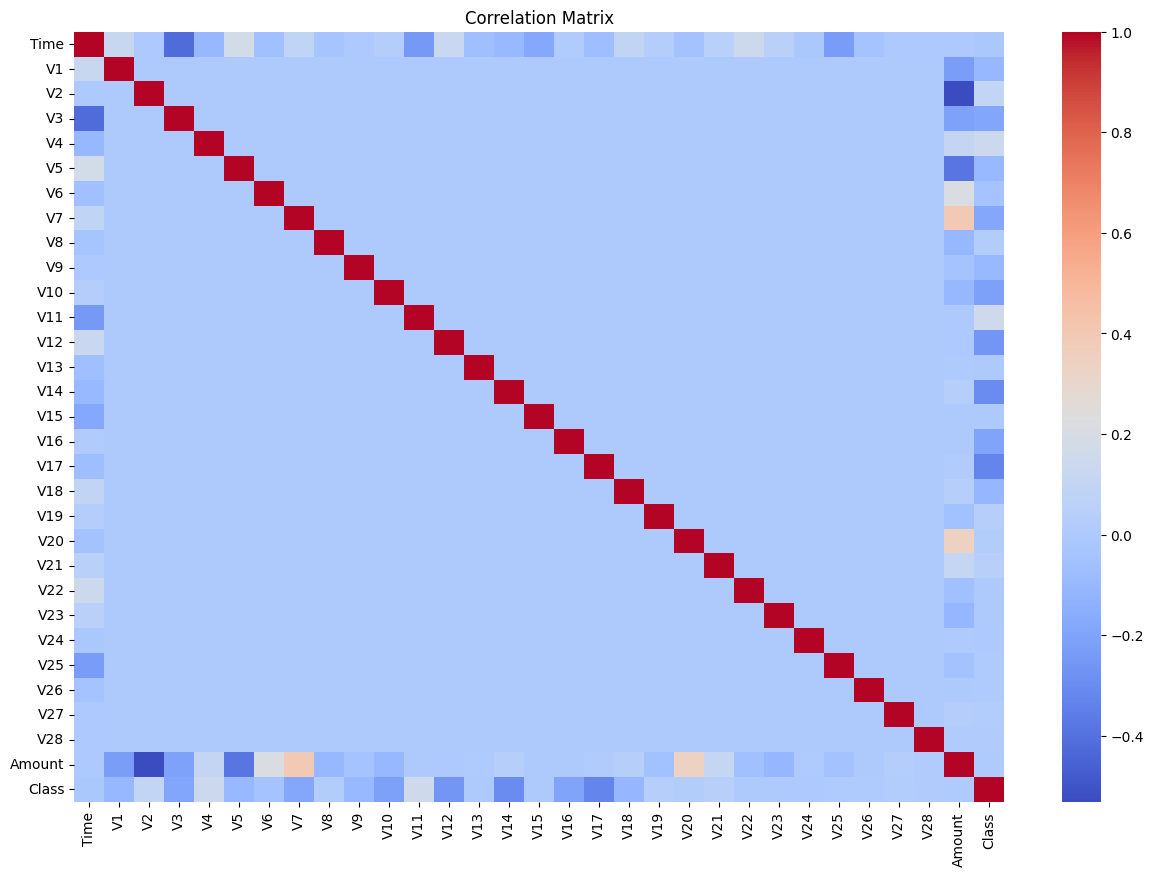

In [12]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

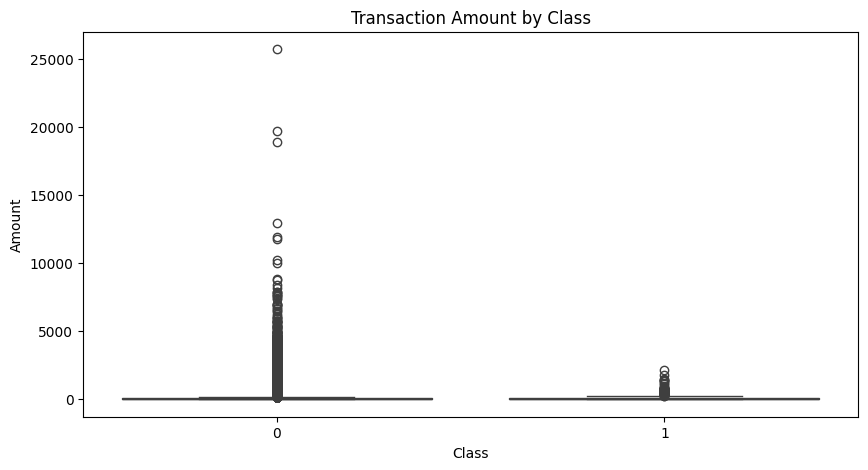

In [13]:
# Separate the data classes
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Compare Amount for Fraud and Non-Fraud
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

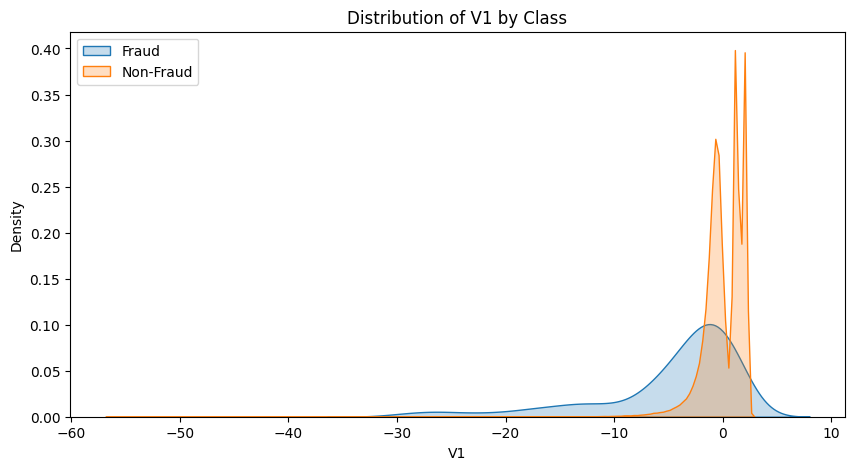

In [14]:
#Compare distributions of V1 for Fraud and Non-Fraud
plt.figure(figsize=(10, 5))
sns.kdeplot(fraud['V1'], label='Fraud', fill=True)
sns.kdeplot(non_fraud['V1'], label='Non-Fraud', fill=True)
plt.title('Distribution of V1 by Class')
plt.legend()
plt.show()


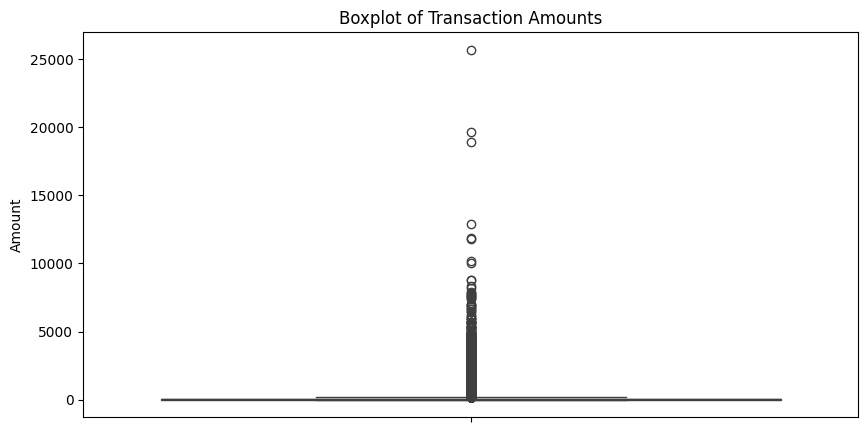

In [15]:
# Boxplot for Amount to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()


In [16]:
newdf = df.copy()
newdf['Amount'] = RobustScaler().fit_transform(newdf['Amount'].values.reshape(-1,1))
time = newdf['Time']
newdf['Time'] = (time - time.min()) / (time.max() - time.min())
newdf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [17]:
newdf = newdf.sample(frac=1, random_state=42)
newdf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,0.240202,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,0.256152,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,0.205357,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,0.967192,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,0.975005,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.437624,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,-0.279746,0
259178,0.920181,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,0.939426,0
131932,0.461798,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,-0.252358,0
146867,0.508884,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,-0.293440,0


In [19]:
train, test, val = newdf[:240000], newdf[240000:262000], newdf[262000:]
train['Class'].value_counts(), val['Class'].value_counts(), test['Class'].value_counts()

(Class
 0    239591
 1       409
 Name: count, dtype: int64,
 Class
 0    22768
 1       39
 Name: count, dtype: int64,
 Class
 0    21956
 1       44
 Name: count, dtype: int64)

In [20]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [21]:
X_train, y_train = train_np[:, :-1], train_np[:, -1]
X_test, y_test = test_np[:, :-1], test_np[:, -1]
X_val, y_val = val_np[:, :-1], val_np[:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape, val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 31), (22807,))

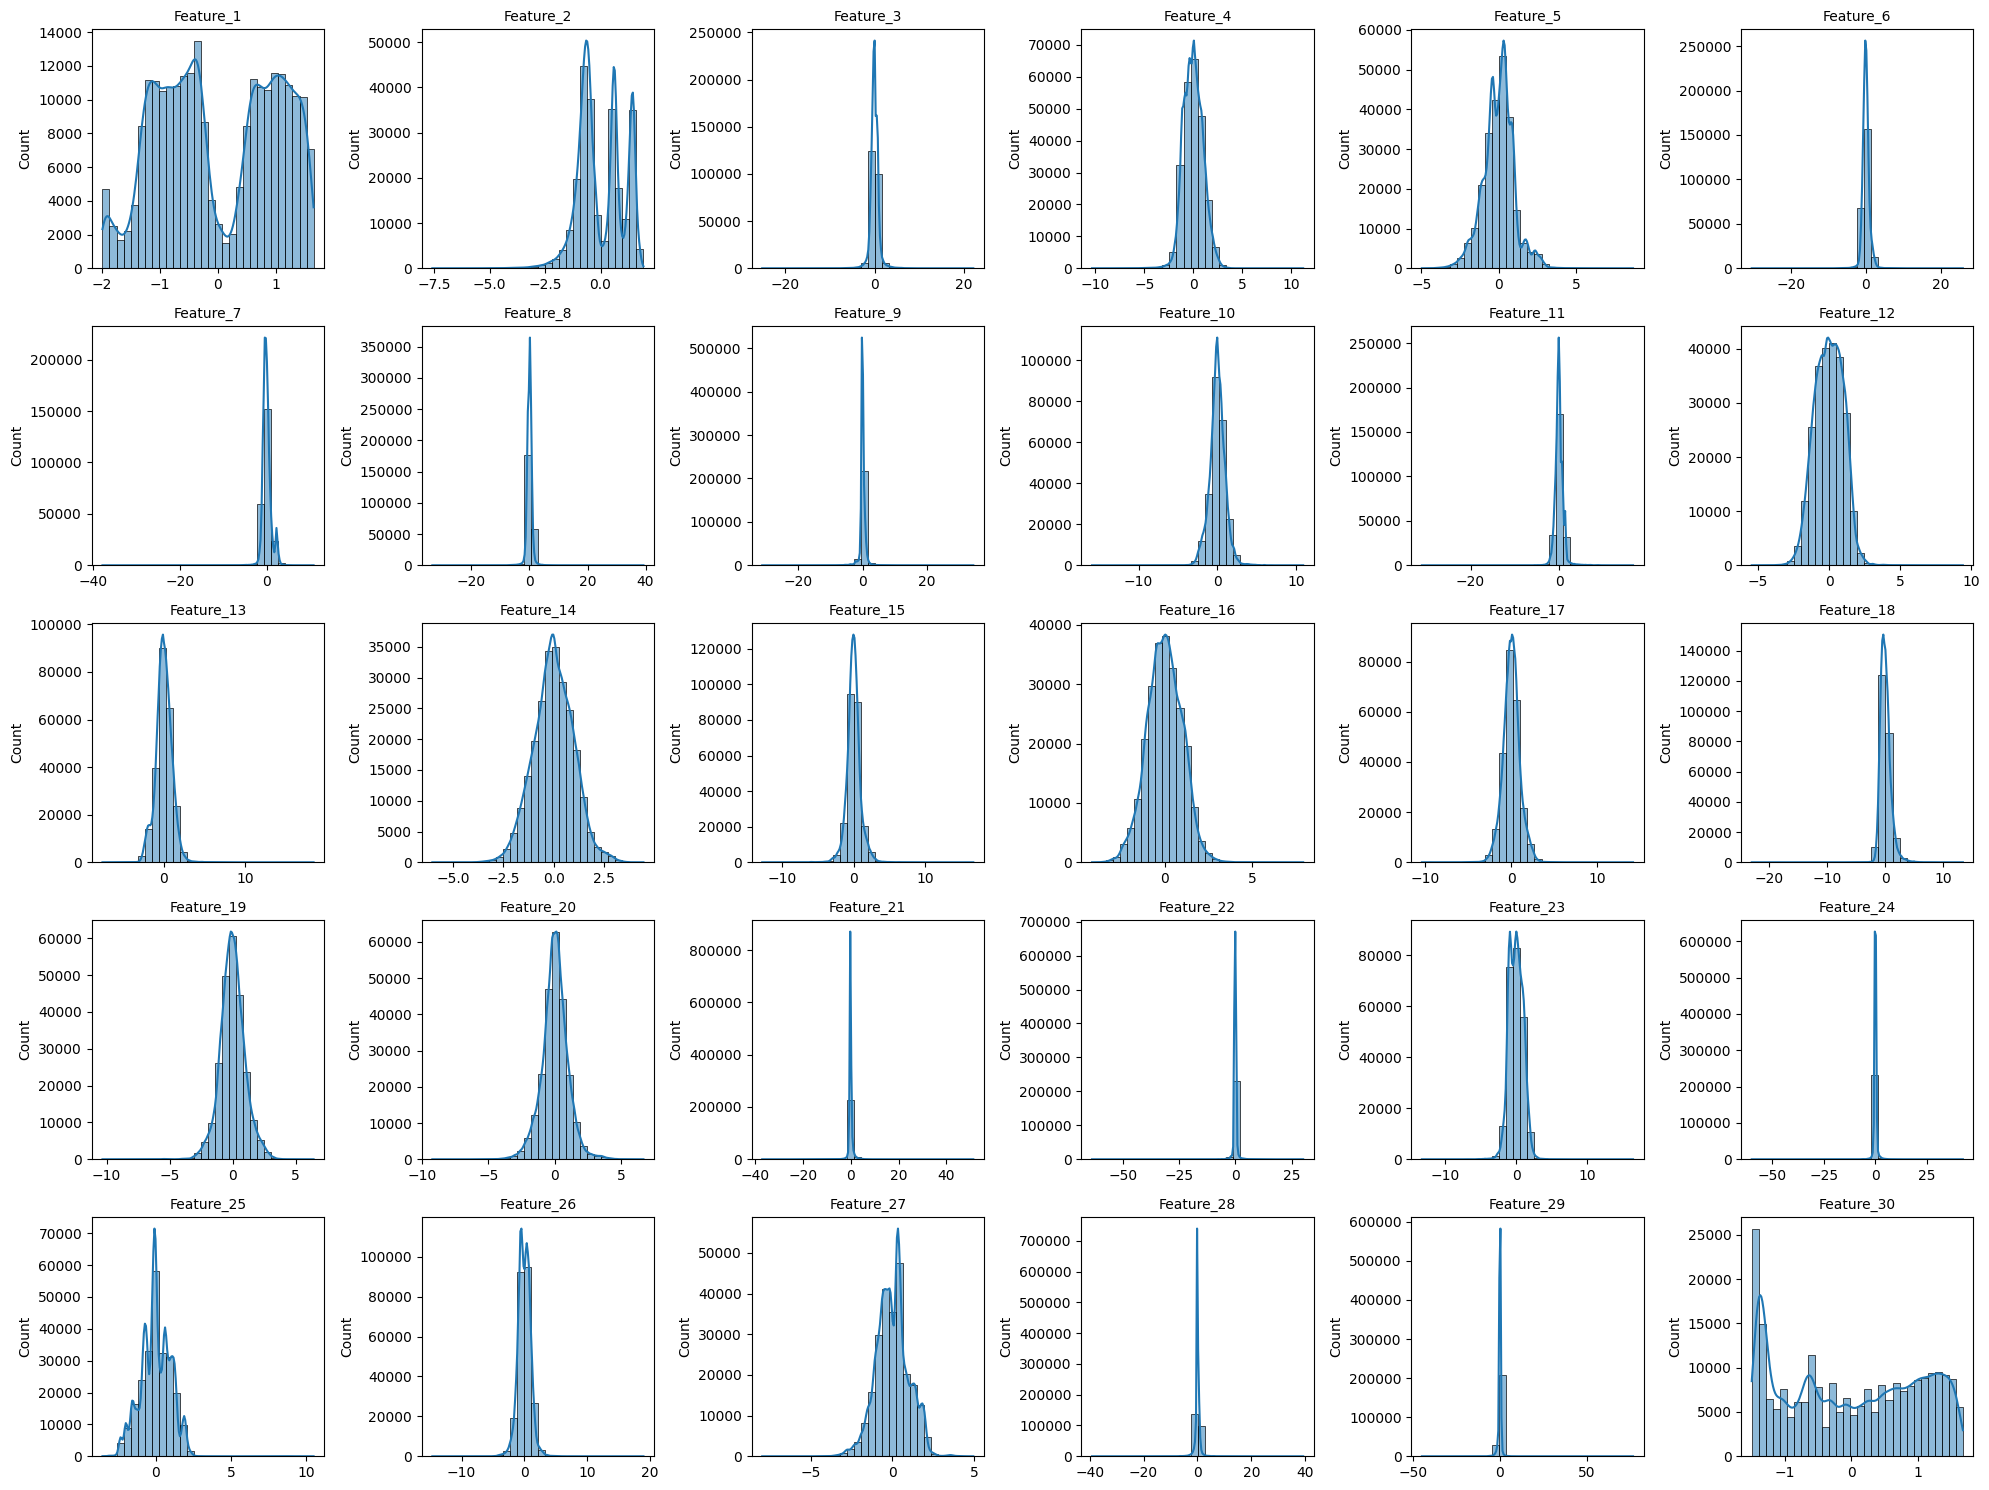

In [77]:
plt.figure(figsize=(20,15))
n = 1

for i in range(X_train.shape[1]):  # Iterate through columns
    plt.subplot(5, 6, n)
    sns.histplot(data=X_train[:, i], kde=True, bins=30)  # Access the i-th column
    plt.title(f'Feature_{i+1}', fontsize=10)  # Title with generic names
    n += 1

plt.tight_layout()
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})


In [78]:
from sklearn.preprocessing import PowerTransformer

# Apply PowerTransformer to the entire NumPy array
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)


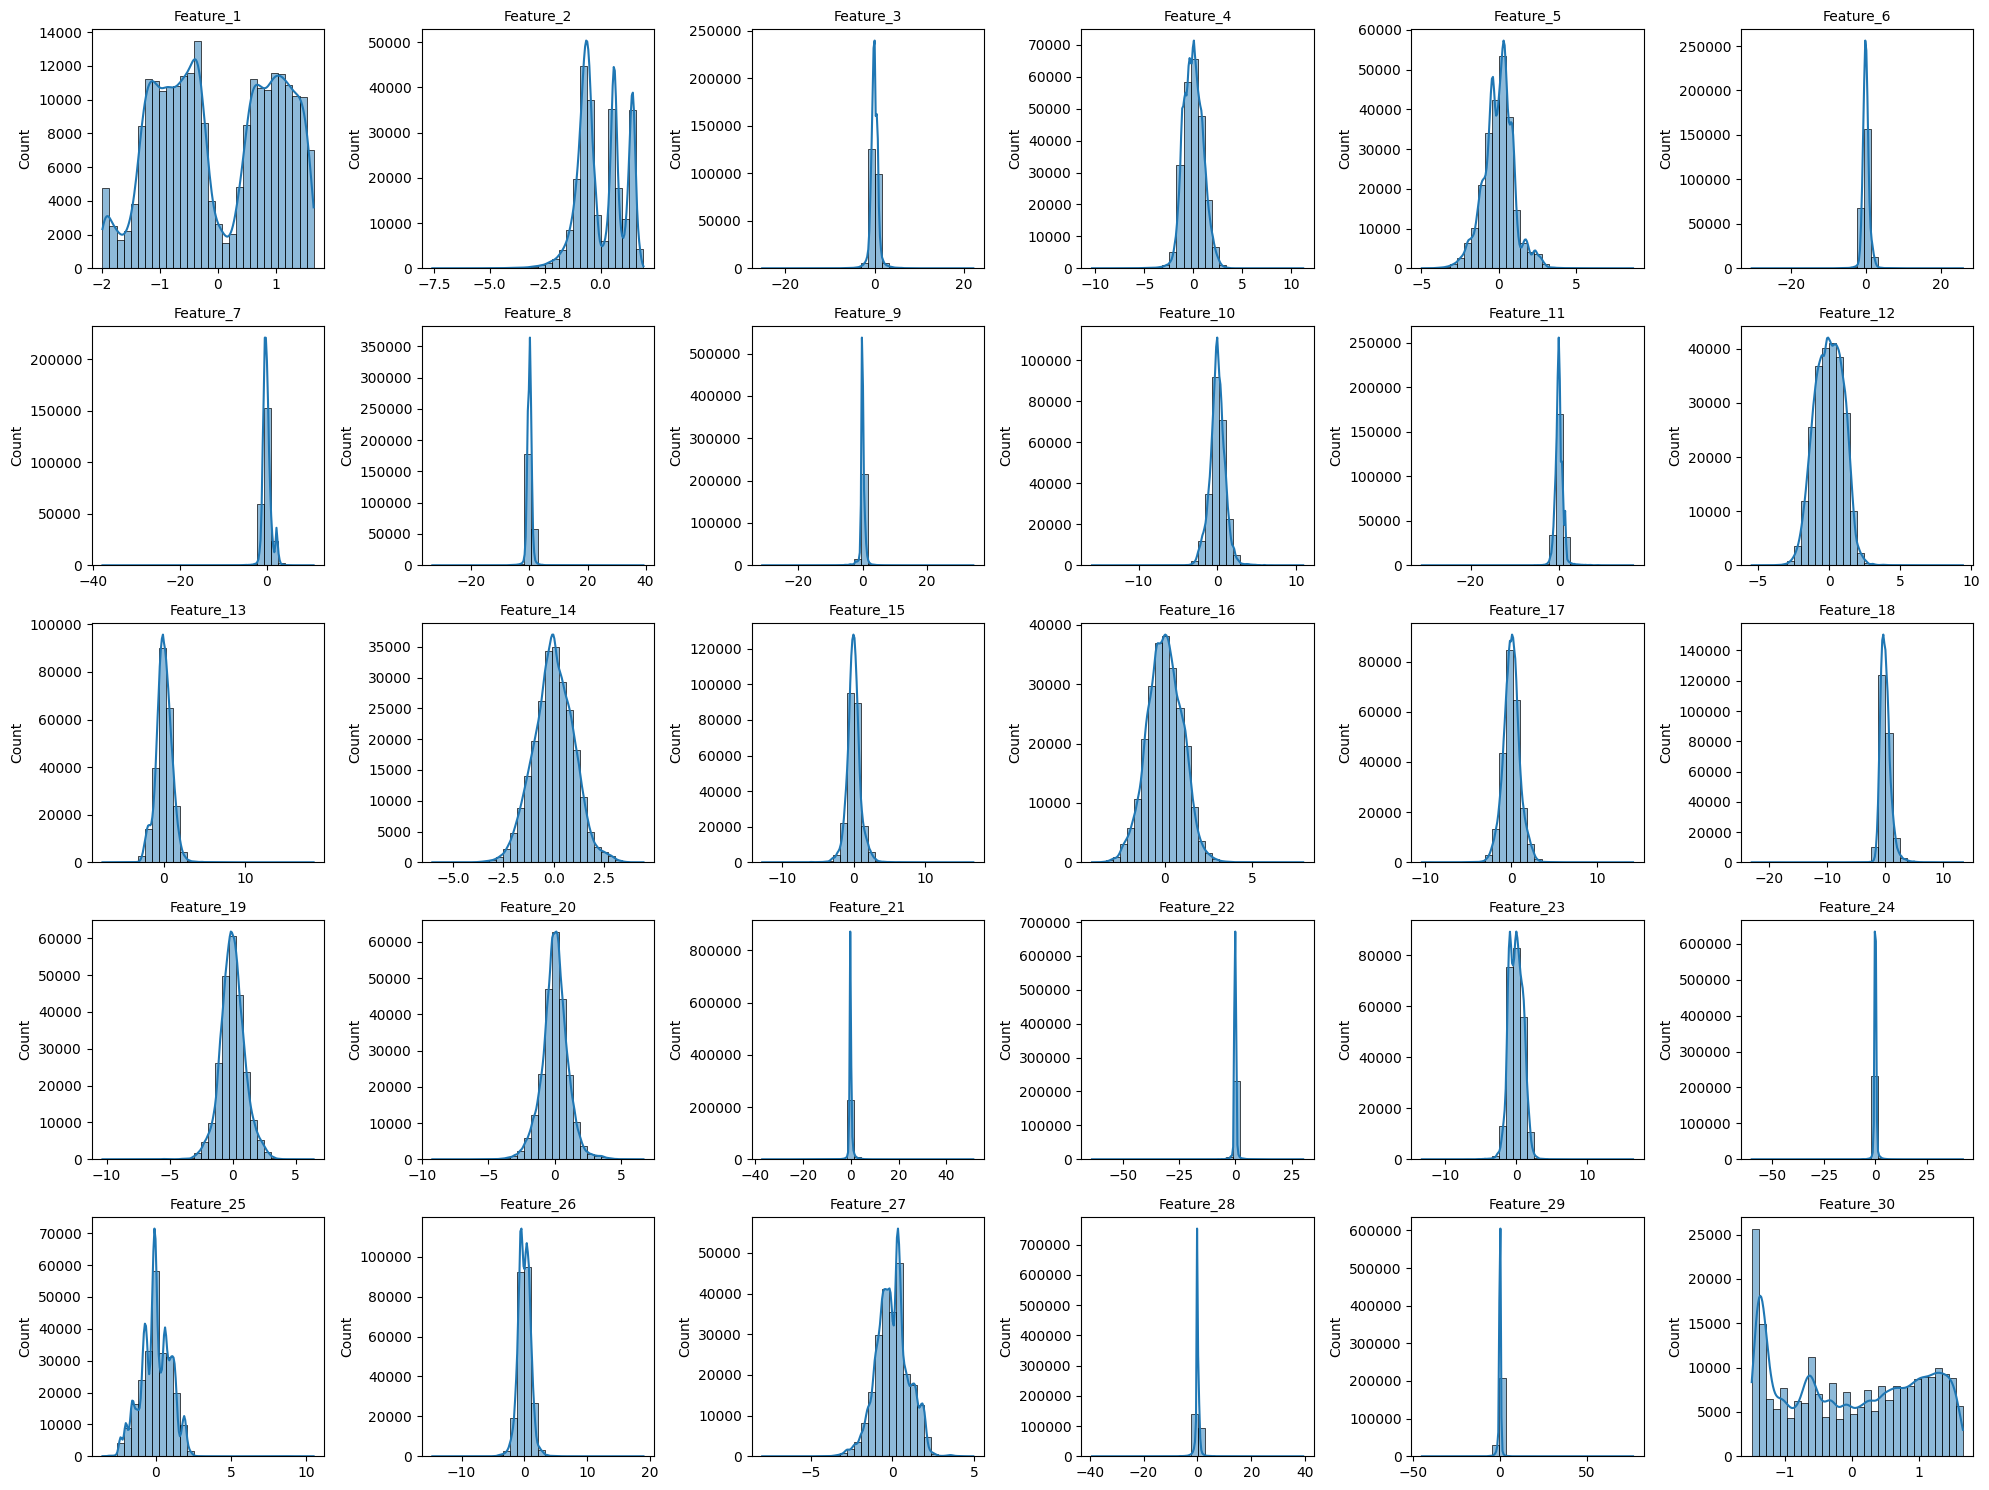

In [79]:
plt.figure(figsize=(20,15))
n = 1

for i in range(X_train.shape[1]):  # Iterate through columns
    plt.subplot(5, 6, n)
    sns.histplot(data=X_train[:, i], kde=True, bins=30)  # Access the i-th column
    plt.title(f'Feature_{i+1}', fontsize=10)  # Title with generic names
    n += 1

plt.tight_layout()
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})


In [81]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({np.float64(0.0): 239586, np.float64(1.0): 414})
After performing smote :  Counter({np.float64(0.0): 239586, np.float64(1.0): 239586})


In [22]:
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, y_train)
print("Training accuracy: ", LR_model.score(X_train, y_train))

Training accuracy:  0.9992625


In [23]:
print(classification_report(y_val, LR_model.predict(X_val), target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     22768
       Fraud       0.89      0.64      0.75        39

    accuracy                           1.00     22807
   macro avg       0.95      0.82      0.87     22807
weighted avg       1.00      1.00      1.00     22807



In [24]:
shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
shallow_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [26]:
shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9652 - loss: 0.1583 - val_accuracy: 0.9995 - val_loss: 0.0085
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0059
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0070
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0075
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0074


In [27]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, X_val)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [28]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, X_val), target_names=['Not Fraud', 'Fraud']))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.77      0.85      0.80        39

    accuracy                           1.00     22807
   macro avg       0.88      0.92      0.90     22807
weighted avg       1.00      1.00      1.00     22807



In [29]:
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(X_train, y_train)
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.89      0.62      0.73        39

    accuracy                           1.00     22807
   macro avg       0.94      0.81      0.86     22807
weighted avg       1.00      1.00      1.00     22807



In [30]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22768
       Fraud       0.75      0.69      0.72        39

    accuracy                           1.00     22807
   macro avg       0.87      0.85      0.86     22807
weighted avg       1.00      1.00      1.00     22807



In [31]:
svc = LinearSVC(class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)
print(classification_report(y_val, svc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22768
       Fraud       0.08      1.00      0.15        39

    accuracy                           0.98     22807
   macro avg       0.54      0.99      0.57     22807
weighted avg       1.00      0.98      0.99     22807

